# 교차 검증(Cross Validation)
---
- 데이터셋 부족에 대한 과소적합 해결
- 테스트 데이터셋에 대한 과대적합(Overfitting) 해결
- cross_validate()함수 사용
    - 기본 값 cv = 5-Fold ===> 모델 5개

In [209]:
from sklearn.model_selection import cross_validate
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import numpy as np

In [210]:
# 데이터 준비
data=load_iris()
input_data=data['data']
input_target=data['target']

In [211]:
input_data.shape, input_target.shape

((150, 4), (150,))

In [212]:
# 모델 객체 생성
model=LogisticRegression(max_iter=500)

In [213]:
# 5-Fold로 5등분으로 나누어서 학습/검증 모델 생성 진행
result=cross_validate(model,
                     input_data,
                     input_target,
                     return_train_score=True,
                     cv=10)

In [214]:
result

{'fit_time': array([0.02704334, 0.02248096, 0.02855062, 0.0181694 , 0.03029275,
        0.02159429, 0.03493953, 0.01737523, 0.02378416, 0.02137303]),
 'score_time': array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00362945]),
 'test_score': array([1.        , 0.93333333, 1.        , 1.        , 0.93333333,
        0.93333333, 0.93333333, 1.        , 1.        , 1.        ]),
 'train_score': array([0.97037037, 0.97777778, 0.97037037, 0.97037037, 0.97777778,
        0.97777778, 0.98518519, 0.97037037, 0.97037037, 0.97777778])}

In [215]:
result['test_score'].mean()

0.9733333333333334

# 

# 결정트리(Decision Tree)
---
- 직관적이고 쉬운 모델 방식
- 스무고개 퀴즈 형식
- 과적합의 발생으로 다른 모델 대비 성능이 좋지 않은 모델
- 단독으로 사용되는 경우보다 여러개의 DT가 모여서 사용됨

In [216]:
# 모듈 로딩
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree  # 트리 시각화 함수
import pandas as pd

### [1] 데이터 로딩
---

In [217]:
# numpy => DataFrame 형태로 데이터 로딩
# return_X_y=True, as_frame=True
dataX, datay = load_breast_cancer(return_X_y=True, as_frame=True)

# Bunch 타입 => Key로 data, target, target_names, feature_names...
# dataX, datay = load_breast_cancer

In [218]:
dataX.info(), dataX.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

(None,
 Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error', 'fractal dimension error',
        'worst radius', 'worst texture', 'worst perimeter', 'worst area',
        'worst smoothness', 'worst compactness', 'worst concavity',
        'worst concave points', 'worst symmetry', 'worst fractal dimension'],
       dtype='object'))

In [219]:
f_names = dataX.columns

In [220]:
dataX.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

### [2] 학습 & 테스트 데이터 분리

In [221]:
type(dataX.values), type(datay.values)

(numpy.ndarray, numpy.ndarray)

In [222]:
dataX = dataX.to_numpy()
datay = datay.to_numpy()

In [223]:
# train : test = 75:25 <- test_size로 조절 하면 됨
# stratify=라벨 즉 타겟 데이터 지정 : 학습&테스트 데이터에도 비율 맞추기
train_X, test_X, train_y, test_y = train_test_split(dataX,
                                                   datay,
#                                                    shuffle=False,  # stratify 랑 같이 못 씀?
                                                   stratify=datay,
                                                   random_state=42)

In [224]:
print(f'train_X : {train_X.shape}, test_X : {test_X.shape}')

train_X : (426, 30), test_X : (143, 30)


### [3] 학습
---
- DecisionTreeClassifier 학습 방법

In [225]:
# 모델 객체 생성
dtModel = DecisionTreeClassifier()

In [226]:
# 학습용 데이터로 학습 진행
dtModel.fit(train_X, train_y)  # values 안주면 predict 에서 warning 뜸

DecisionTreeClassifier()

### [4] 평가

In [227]:
train_score=dtModel.score(train_X, train_y)
test_score=dtModel.score(test_X, test_y)
# 여기도 values 줘야 warning 안뜸

In [228]:
test_X[0]

array([1.275e+01, 1.670e+01, 8.251e+01, 4.938e+02, 1.125e-01, 1.117e-01,
       3.880e-02, 2.995e-02, 2.120e-01, 6.623e-02, 3.834e-01, 1.003e+00,
       2.495e+00, 2.862e+01, 7.509e-03, 1.561e-02, 1.977e-02, 9.199e-03,
       1.805e-02, 3.629e-03, 1.445e+01, 2.174e+01, 9.363e+01, 6.241e+02,
       1.475e-01, 1.979e-01, 1.423e-01, 8.045e-02, 3.071e-01, 8.557e-02])

In [229]:
print(f'train_score : {train_score} - test_score : {test_score}')

train_score : 1.0 - test_score : 0.9090909090909091


In [230]:
dtModel.predict([test_X[0]])

array([1])

### DTree 시각화
---
- plot_tree()

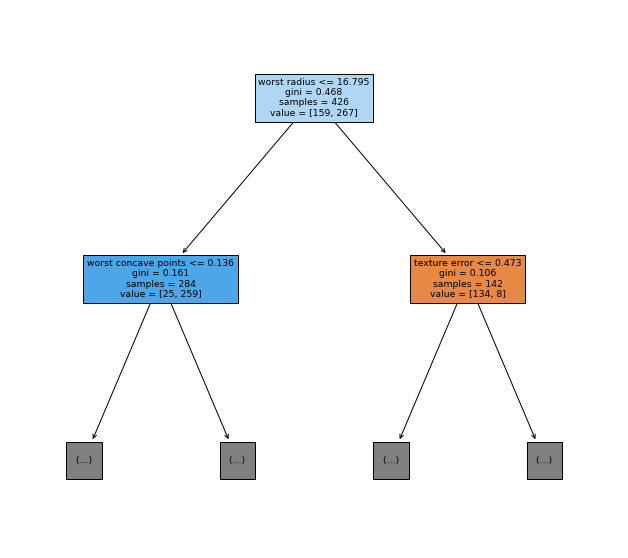

In [231]:
import matplotlib.pyplot as plt

plt.figure(figsize=(11, 10))
plot_tree(dtModel, max_depth=1, filled=True, feature_names=f_names)
plt.show()

### 모델 속성 확인
---
- DT에서 속성들 중에서 속성도 중요도를 감지 간으
- Feature별로 특성들의 중요도 값
- 모든 값 합치면 1

In [232]:
dtModel.feature_importances_.max(), dtModel.feature_importances_.argmax(), f_names[20]

(0.6954632181471273, 20, 'worst radius')

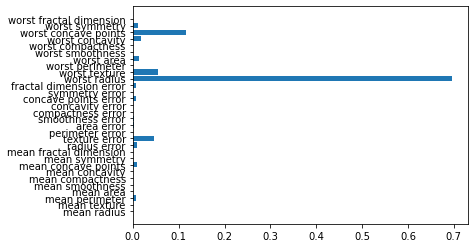

In [233]:
plt.barh(y=f_names, width=dtModel.feature_importances_)
plt.show()

### RandomForest 학습 모델
---
- 100개 DecisionTree 모델
- 중복허용된 랜덤샘플 데이터 + DecisionTree 모델

In [234]:
from sklearn.ensemble import RandomForestClassifier

In [235]:
# oob_score_ : 중복허용랜덤샘플에 포함되지 않은 데이터 => 검증용으로 사용
forestModel = RandomForestClassifier(max_depth=5,
                                    oob_score=True)

In [236]:
forestModel.fit(train_X, train_y)

RandomForestClassifier(max_depth=5, oob_score=True)

In [237]:
# 모델 학습 후 속성
print(f'classes_ : {forestModel.classes_}')

classes_ : [0 1]


In [238]:
print(f'base_estimator_ : {forestModel.base_estimator_}')

base_estimator_ : DecisionTreeClassifier()


In [239]:
print(f'estimators_ : {forestModel.estimators_}')

estimators_ : [DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=907274078), DecisionTreeClassifier(max_depth=5, max_features='auto',
                       random_state=1293174870), DecisionTreeClassifier(max_depth=5, max_features='auto',
                       random_state=1407022785), DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=31610548), DecisionTreeClassifier(max_depth=5, max_features='auto',
                       random_state=1558634735), DecisionTreeClassifier(max_depth=5, max_features='auto',
                       random_state=1152868616), DecisionTreeClassifier(max_depth=5, max_features='auto',
                       random_state=1628642224), DecisionTreeClassifier(max_depth=5, max_features='auto',
                       random_state=1378933319), DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=184961531), DecisionTreeClassifier(max_depth=5, max_features='auto',
                       random_state=1256134610)

In [240]:
print(f'oob_score : {forestModel.oob_score_}')

oob_score : 0.960093896713615


In [241]:
bestModel = forestModel.base_estimator_

In [242]:
## 평가
train_score=forestModel.score(train_X, train_y)
test_score=forestModel.score(test_X, test_y)

In [243]:
train_score, test_score

(0.9929577464788732, 0.958041958041958)

In [244]:
# 특정 중요도 저장 속성 그래프 출력
forestModel.feature_importances_

array([0.03669516, 0.01496348, 0.04391492, 0.04983216, 0.00757844,
       0.00939898, 0.01679008, 0.10850236, 0.00335414, 0.00300914,
       0.00563341, 0.00397676, 0.02515183, 0.03590133, 0.00428732,
       0.00388214, 0.00583709, 0.00191104, 0.00409192, 0.00490149,
       0.11328428, 0.01629697, 0.11990752, 0.11145392, 0.0153687 ,
       0.0215806 , 0.04205877, 0.15352633, 0.01358514, 0.0033246 ])

In [245]:
forestModel.n_features_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


30

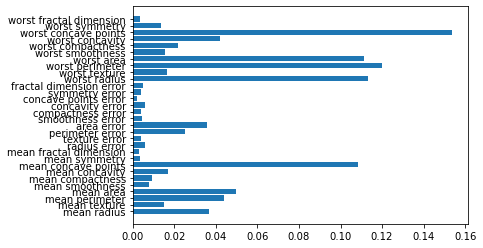

In [246]:
plt.barh(y=f_names,
        width=forestModel.feature_importances_)
plt.show()

# 

# Sklearn 모델 추천 함수 활용
---
- sklearn.utils 모듈의 all_estimatores(type_filter)
    - type_filter 파라미터 : 'classifier', 'regressor' 지정
    - 반환 : 해당 타입의 모델 리스트 => 모델이름, 모델 객체

In [247]:
# 모듈 로딩
from sklearn.utils import all_estimators
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np

### [1] 데이터 로딩 및 확인
---

In [248]:
# Bunch 데이터 타입 => dict와 유사한 형태
data = load_iris()

In [249]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [250]:
# data, target => numpy 타입
# target_names => 라벨 ---> setosa, versicolor, ...
# feature_names => 컬럼명
input_data=data['data']
input_target=data['target']

In [251]:
input_data.shape, input_target.shape

((150, 4), (150,))

### [2] 학습 데이터 분리
---

In [252]:
# 학습-테스트 데이터셋 80:20
train_X, test_X, train_y, test_y = train_test_split(input_data,
                                                   input_target,
                                                   test_size=0.2)

### [3] 학습
---
- 학습방법 선정 => 분류 / 회귀
    - 분류 => knn, LogisticRegression, DecisionTreeClassifier, SGDClassifier, SVC ...
    - 분류 모델 적용 후 결과 => all_estimators()

In [253]:
# 필터 타입에 해당하는 sklearn에 존재하는 모든 모델 이름과 객체 리스트로 반환
models = all_estimators(type_filter='classifier')

In [254]:
scores = []
for name, model in models:
    try:
        # 모델 객체 생성
        md=model()
        # 학습
        md.fit(train_X, train_y)
        # 평가
        result = md.score(test_X, test_y)
        scores.append((name, np.round(result, 3)))
    except:
        pass

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

In [255]:
scores

[('AdaBoostClassifier', 1.0),
 ('BaggingClassifier', 1.0),
 ('BernoulliNB', 0.233),
 ('CalibratedClassifierCV', 0.933),
 ('CategoricalNB', 0.967),
 ('ComplementNB', 0.767),
 ('DecisionTreeClassifier', 1.0),
 ('DummyClassifier', 0.233),
 ('ExtraTreeClassifier', 1.0),
 ('ExtraTreesClassifier', 1.0),
 ('GaussianNB', 1.0),
 ('GaussianProcessClassifier', 1.0),
 ('GradientBoostingClassifier', 1.0),
 ('HistGradientBoostingClassifier', 1.0),
 ('KNeighborsClassifier', 1.0),
 ('LabelPropagation', 1.0),
 ('LabelSpreading', 1.0),
 ('LinearDiscriminantAnalysis', 1.0),
 ('LinearSVC', 1.0),
 ('LogisticRegression', 1.0),
 ('LogisticRegressionCV', 1.0),
 ('MLPClassifier', 1.0),
 ('MultinomialNB', 0.633),
 ('NearestCentroid', 1.0),
 ('NuSVC', 1.0),
 ('PassiveAggressiveClassifier', 0.933),
 ('Perceptron', 0.833),
 ('QuadraticDiscriminantAnalysis', 1.0),
 ('RadiusNeighborsClassifier', 1.0),
 ('RandomForestClassifier', 1.0),
 ('RidgeClassifier', 0.867),
 ('RidgeClassifierCV', 0.867),
 ('SGDClassifier', 0.9